# Predicting if I can, safely, eat that mushroom

## Introduction
### Objective
Create a model that can perform a binary classification of a mushroom, following the dataset features, into:
* Definitively edible.
* Definitively poisonous.
* Unknown edibility and not recommended(combined with the poisonous class).

This is a binary classification task.

Since it's a death or life business, I'll like to reach an accuracy $>= 95 \%$.

### Dataset Information

There are 20 features(n: nominal, m: metrical)

1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w

### References

* [Dataset](https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset)
* [Mushroom data creation, curation, and simulation to support classification tasks | Scientific Reports](https://www.nature.com/articles/s41598-021-87602-3)
* [Mushroom anatomy](https://www.realmushrooms.com/mushroom-anatomy-parts/)


## Data Exploration

In this section we are going to get acquainted with our dataset. Some questions to ask:

* What does each of the 20 features mean?
* How each of the different features influence the mushroom's class?
* Can the edible class of the mushroom be predicted taking only the color features into consideration? There are some frogs that are poisonous, and you
  can distinguish them with their colors.
* Can the mushroom's edible class be predicted with the metrical features alone?
* Is there a season/s where there are more poisonous mushrooms?
* Is there a habitat that growns more poisonous mushrooms?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("data/secondary_data.csv", sep=";")
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


<Axes: >

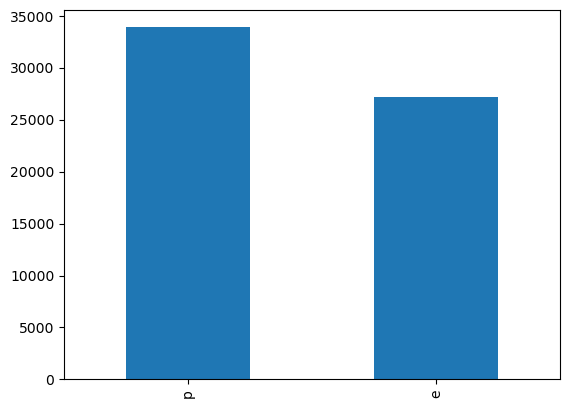

In [2]:
df["class"].value_counts().plot(kind="bar")

In [3]:
p = df[df["class"] == "p"]
e = df[df["class"] == "e"]
len(p) / len(e)

1.2467532467532467

There are $~25\%$ more poisonous labeled mushrooms in the dataset than edibles ones.

Are there missing values for some of dataset's columns?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [5]:
df.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

As we can see, `cap_surface`, `gill-attachment`, `gill-spacing`, `stem-root`, `stem-surface`, `veil-type`, `veil-color`,
`ring-type` and `spore-print-color` have missing values. Let's explore some of them.

### Veil Type

In [6]:
df["veil-type"].value_counts()

u    3177
Name: veil-type, dtype: int64

All of them are 'u': universal. 

From Wikipedia: 

> A veil or velum, in mycology, is one of several structures in fungi, especially the thin membrane that covers the cap and stalk of an immature mushroom.[1]
In mycology, a universal veil is a temporary membranous tissue that fully envelops immature fruiting bodies of certain gilled mushrooms. The developing Caesar's mushroom (Amanita caesarea), for example, which may resemble a small white sphere at this point, is protected by this structure. The veil will eventually rupture and disintegrate by the force of the expanding and maturing mushroom, but will usually leave evidence of its former shape with remnants. These remnants include the volva, or cup-like structure at the base of the stipe, and patches or "warts" on top of the cap. This macrofeature is useful in wild mushroom identification because it is an easily observed, taxonomically significant feature. It is a character present among species of basidiomycete fungi belonging to the genera Amanita and Volvariella. This has particular importance due to the disproportionately high number of potentially lethal species contained within the former genus.

It's a pity that there are so many missing values for the veil type because it seems to be an important factor to decide if a mushroom is poisonous or not.

## Cap Shape

From [Wikipedia](https://en.wikipedia.org/wiki/Mushroom_poisoning)

>The shape of the mushroom cap does not correlate with presence or absence of mushroom toxins, so this is not a reliable method to distinguish between edible and poisonous species. Death cap, for instance, has a rounded cap when mature.

From this, it's seem safe to disregard `cap-shape` from the analysis.

## Cap Color

<Axes: >

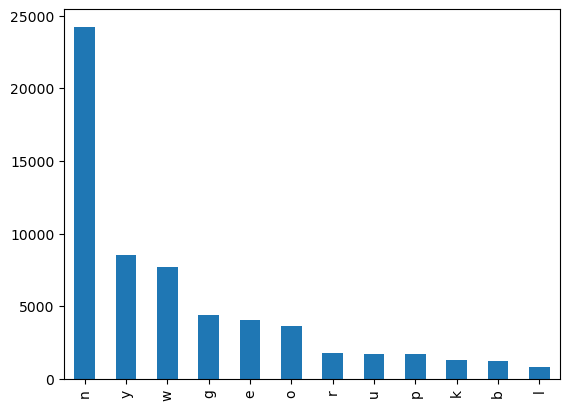

In [7]:
df["cap-color"].value_counts().plot(kind="bar")

cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k

<Axes: ylabel='Frequency'>

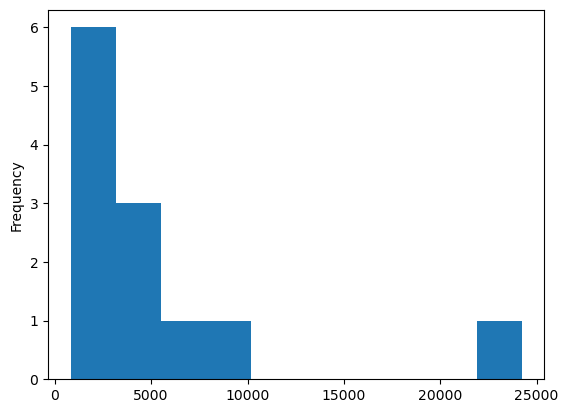

In [8]:
df["cap-color"].value_counts().plot(kind="hist")

We can see that the cap colors is heavily biased by brown mushrooms.

In [9]:
pd.crosstab(df["cap-color"], df["class"])

class,e,p
cap-color,,
b,974,256
e,880,3155
g,2297,2123
k,501,778
l,452,376
n,12407,11811
o,1071,2585
p,449,1254
r,198,1584


<Axes: xlabel='cap-color'>

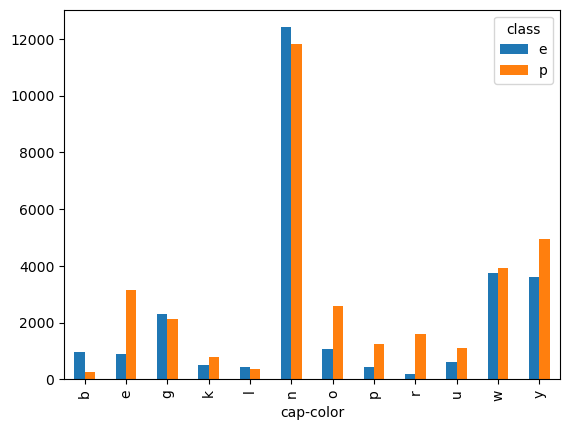

In [10]:
pd.crosstab(df["cap-color"], df["class"]).plot(kind="bar")

cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k

When the cap color is red, orange, pink, green, purple or yellow, the mushroom have a much greater chance of being non-edible according to the dataset. What about the veil color?

## Veil color

veil-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f

In [11]:
df["veil-color"].value_counts()

w    5474
y     527
n     525
u     353
k     353
e     181
Name: veil-color, dtype: int64

<Axes: xlabel='veil-color'>

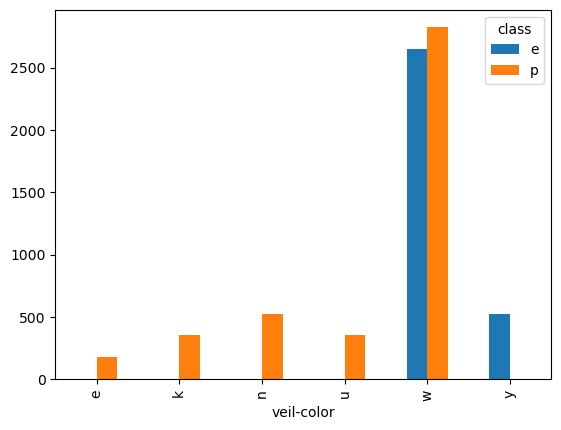

In [12]:
pd.crosstab(df["veil-color"], df["class"]).plot(kind="bar")

It looks like that red, black, brown and purple veil colors tend to be labeled as poisonous.

### Cast strings to categories

In [16]:
string_cols = []
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        string_cols.append(label)
string_cols

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

In [17]:
# This will turn all of the string values into category values.
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   class                 61069 non-null  category
 1   cap-diameter          61069 non-null  float64 
 2   cap-shape             61069 non-null  category
 3   cap-surface           46949 non-null  category
 4   cap-color             61069 non-null  category
 5   does-bruise-or-bleed  61069 non-null  category
 6   gill-attachment       51185 non-null  category
 7   gill-spacing          36006 non-null  category
 8   gill-color            61069 non-null  category
 9   stem-height           61069 non-null  float64 
 10  stem-width            61069 non-null  float64 
 11  stem-root             9531 non-null   category
 12  stem-surface          22945 non-null  category
 13  stem-color            61069 non-null  category
 14  veil-type             3177 non-null   category
 15  ve

### Fill missing categorical values and convert non missing categorical to their codes

In [20]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[f"{label}_is_missing"] = pd.isnull(content)
        df[label] = pd.Categorical(content).codes + 1

In [21]:
df["stem-color"].value_counts()

12    22926
7     18063
13     7865
4      2626
8      2187
2      2050
11     1490
3      1059
9      1025
5       837
10      542
6       226
1       173
Name: stem-color, dtype: int64

In [22]:
df.isna().sum()

class                              0
cap-diameter                       0
cap-shape                          0
cap-surface                        0
cap-color                          0
does-bruise-or-bleed               0
gill-attachment                    0
gill-spacing                       0
gill-color                         0
stem-height                        0
stem-width                         0
stem-root                          0
stem-surface                       0
stem-color                         0
veil-type                          0
veil-color                         0
has-ring                           0
ring-type                          0
spore-print-color                  0
habitat                            0
season                             0
class_is_missing                   0
cap-shape_is_missing               0
cap-surface_is_missing             0
cap-color_is_missing               0
does-bruise-or-bleed_is_missing    0
gill-attachment_is_missing         0
g

Since we have all of the string features converted to numbers and there are no more missing values, we can move forward to building our model.

## Modelling

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
clf = RandomForestClassifier()
X = df.drop("class", axis=1)
y = df["class"]
X.shape, y.shape

((61069, 38), (61069,))

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9999181267398067

In [26]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9999181267398067

This is not what I expected! I wonder if I made a mistake...

### Feature Importance

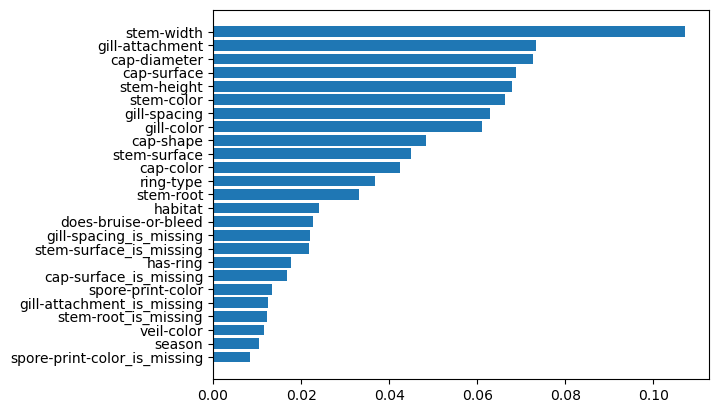

In [46]:
def plot_features(columns, importances, n=25):
    df = pd.DataFrame(
        {"features": columns, "feature_importances": importances}
    ).sort_values("feature_importances", ascending=False).reset_index(drop=True)
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.invert_yaxis()

plot_features(X.columns, clf.feature_importances_)